## INFX574 Problem Set 5 ##
#### Deadline: Wed, May 23rd, 5:30pm ####
#### Submitted By: Harkar Talwar####

In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import time
import sys
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

### 1. Active data exploration ###

#### 1. Load the data. It is included in sklearn.datasets and you can and many copies on the internet too. Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious. ####

In [2]:
boston_housing = load_boston() # load the dataset
boston_df = pd.DataFrame(data=boston_housing.data, columns=boston_housing.feature_names) # create a dataframe
boston_df['MEDV'] = boston_housing.target # Add the outcome variable (median house value)

In [3]:
boston_df.head() # explore some rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**There are two features which are categorical in nature and warrant some explanation of the coding scheme**

**CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)**

In [4]:
boston_df['CHAS'].unique()

array([0., 1.])

**RAD: index of accessibility to radial highways (ordinal in nature)**

In [5]:
boston_df['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

#### 2. Add some (10 or so) engineered features (synthetic features) to the data. As in the previous problem set, you may use various mathematical operations on a single or multiple features to create new ones. ####

In [6]:
boston_df['E1'] = np.log(boston_df['B'])
boston_df['E2'] = np.log(boston_df['TAX'])
boston_df['E3'] = (boston_df['AGE'] > 30) + 0
boston_df['E4'] = boston_df['CRIM'] * boston_df['TAX']
boston_df['E5'] = boston_df['CRIM'] * boston_df['B']
boston_df['E6'] = boston_df['INDUS'] ** 2
boston_df['E7'] = boston_df['RM'] ** 2
boston_df['E8'] = (boston_df['LSTAT'] > 18) + 0
boston_df['E9'] = boston_df['LSTAT'] * np.log(boston_df['LSTAT'])
boston_df['E10'] = boston_df['PTRATIO'] * boston_df['NOX']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,5.983684,5.690359,1,1.87072,2.508408,5.3361,43.230625,0,7.995041,8.2314
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,5.983684,5.488938,1,6.60902,10.839339,49.9849,41.229241,0,20.223716,8.3482
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,5.973377,5.488938,1,6.60418,10.720331,49.9849,51.624225,0,5.616878,8.3482
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,5.977949,5.402677,1,7.18614,12.774173,4.7524,48.972004,0,3.170524,8.5646
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.983684,5.402677,1,15.32910,27.405945,4.7524,51.079609,0,8.918962,8.5646


#### 3. Add another set (10 or so) bogus features, variables that have no relationship whatsoever to Boston housing market. You may just pick random numbers, or numbers from irrelevant sources, such as population of Chinese cities or baseball scores of yesteryear. Give these features distinct names (such as B1-B10) so you (and the reader) can easily recognize these later. You should have about 35 features in your data now.####

In [7]:
boston_df.shape # explore the shape of our Boston housing data

(506, 24)

**Here we will add Bogus features from the cellular nuclei data of the Wisconsin Breast Cancer (Diagnostic) Data Set**

In [8]:
cancer_data = load_breast_cancer().data  # load the cancer data set features
rows, cols = cancer_data.shape  # store the shape of the cancer data

In [9]:
# add new bogus features to the boston data set, based on features in the cancer data
for i in range(10):
    boston_df['B'+str(i+1)] = cancer_data[:506,i+2]

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813


#### 4. Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the price and each variable. You may add more statistics you consider useful to this table. ####

In [11]:
# Create a new data frame to hold summary information
results = pd.DataFrame({'Mean': boston_df.mean(), 'Standard Deviation': boston_df.std(), 
                        'Range': boston_df.max() - boston_df.min(), 'Missing Count': boston_df.isnull().sum(),
                        'Correlation with MEDV': boston_df.corr().loc['MEDV']
                       })
results.index.name = "Variable"
results.reset_index()
results

,Correlation with MEDV,Mean,Missing Count,Range,Standard Deviation
Variable,,,,,
CRIM,-0.385832,3.593761,0,88.969880,8.596783
ZN,0.360445,11.363636,0,100.000000,23.322453
INDUS,-0.483725,11.136779,0,27.280000,6.860353
CHAS,0.175260,0.069170,0,1.000000,0.253994
NOX,-0.427321,0.554695,0,0.486000,0.115878
RM,0.695360,6.284634,0,5.219000,0.702617
AGE,-0.376955,68.574901,0,97.100000,28.148861
DIS,0.249929,3.795043,0,10.996900,2.105710
RAD,-0.381626,9.549407,0,23.000000,8.707259


#### 5. Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the value. Include a few features you consider relevant and a few you consider irrelevant here. ####

**1. Chosen relevant features: LSTAT, RM**  
**2. Chosen irrelevant features: E5, B3**

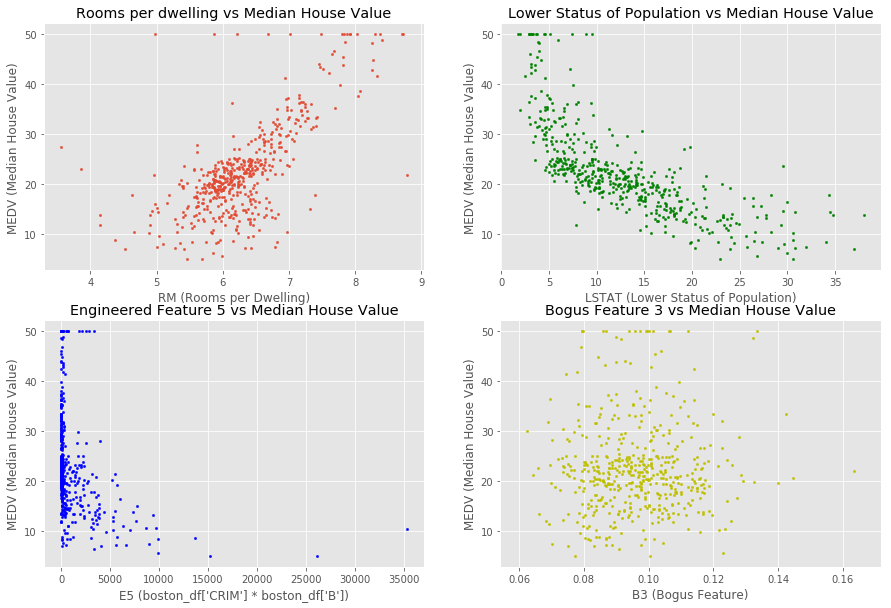

In [12]:
plt.style.use('ggplot')

# Plotting Relevant Features: LSTAT AND RM
fig_boston = plt.figure(figsize=(15,10))
props_axes = {
    'title': 'Rooms per dwelling vs Median House Value',
    'xlabel': 'RM (Rooms per Dwelling)',
    'ylabel': 'MEDV (Median House Value)'
}
axes = fig_boston.add_subplot(221)
axes.set(**props_axes)
_ = axes.scatter(boston_df['RM'], boston_df['MEDV'], s = 5)

props_axes = {
    'title': 'Lower Status of Population vs Median House Value',
    'xlabel': 'LSTAT (Lower Status of Population)',
    'ylabel': 'MEDV (Median House Value)'
}
axes = fig_boston.add_subplot(222)
axes.set(**props_axes)
_ = axes.scatter(boston_df['LSTAT'], boston_df['MEDV'], s = 5, c='g')

# Plotting Irrelevant Features: E5 AND B3
props_axes = {
    'title': 'Engineered Feature 5 vs Median House Value',
    'xlabel': 'E5 (boston_df[\'CRIM\'] * boston_df[\'B\'])',
    'ylabel': 'MEDV (Median House Value)'
}
axes = fig_boston.add_subplot(223)
axes.set(**props_axes)
_ = axes.scatter(boston_df['E5'], boston_df['MEDV'], s = 5, c='b')

props_axes = {
    'title': 'Bogus Feature 3 vs Median House Value',
    'xlabel': 'B3 (Bogus Feature)',
    'ylabel': 'MEDV (Median House Value)'
}
axes = fig_boston.add_subplot(224)
axes.set(**props_axes)
_ = axes.scatter(boston_df['B3'], boston_df['MEDV'], s = 5, c='y')

### 2. Warm-up: a few simple models ###

#### 2.1 Loss function ####

#### 1. Write a function that computes the mean quadratic loss. The function should take three inputs: a) the estimated model (or just the estimated parameters); b) the test data X; and the test labels y. You may add other inputs if you consider it useful, for instance controls for print verbosity. ####

In [13]:
# Function to compute mean quadratic loss.
def compute_loss(model, X, Y):
    coeff = model.coef_  # extract coefficients from the model
    intercept = np.matrix([model.intercept_]) # extract the intercept from the model
    X = np.concatenate((np.ones_like(Y), X), axis=1) # concatenate 1's with the feature matrix to represent the intercept
    coeff = coeff.reshape(len(coeff[0]),1)
    coeff = np.concatenate((intercept, coeff), axis = 0 ) # add the intercept to the vector of coefficients
    # compute the MSE
    par1 = Y - X.dot(coeff)
    return (par1.T.dot(par1)) / len(Y)

#### 2.2 A few simple regressions ####

In [14]:
# Function to perform k-fold cross validation
def perform_k_fold(indices, X, y, k):
    mse = np.empty(k)  # Array to store MSE values for each fold
    
    for i in range(k):
        itest = indices[i::k] # Test set indices
        itrain = list(set(indices).difference(itest)) # Training set indices
        testX = X[itest] # Features from test data
        testY = y[itest] # Outcome from test data
        trainX = X[itrain] # Features from training data
        trainY = y[itrain] # Outcome from training data
        lin_model = LinearRegression().fit(trainX,trainY) # Fitting a linear estimator
        mse[i] = compute_loss(lin_model, testX, testY) # Compute the MSE for this fold
    return np.mean(mse)  # Return the average MSE

In [15]:
# Create and shuffle indices for use by k-fold cross validation
np.random.seed(0)
indices = np.arange(len(boston_df))
np.random.shuffle(indices)

#### 1. Create a small model. It should include 1-2 variables you consider relevant, i.e. features you think should be closely related to price. #### 

In [16]:
# Here we choose the features 'RM', and 'LSTAT' which have a good correlation with our outcome variable
X = boston_df[['RM', 'LSTAT']].as_matrix()
Y = boston_df[['MEDV']].as_matrix()

#### 2. 10-fold cross-validate this model to get the average MSE score (the value of your loss function). ####

In [17]:
print("Mean Quadratic Loss:", perform_k_fold(indices, X, Y, 10))

Mean Quadratic Loss: 31.224016700922483


#### 3. Now build the next model with 10 features. Add more features you consider relevant but also those you consider irrelevant. Compute 10-fold MSE for this model. ####

In [18]:
X = boston_df[['INDUS', 'NOX', 'RM', 'LSTAT', 'TAX', 'B1', 'B2', 'B3', 'B4', 'B5']].as_matrix()  # adding more features

In [19]:
print("Mean Quadratic Loss:", perform_k_fold(indices, X, Y, 10))

Mean Quadratic Loss: 30.466211779667635


#### 4. Finally, include all your features and compute MSE. We call this the full model below. ####

In [20]:
X = boston_df[boston_df.columns.difference(['MEDV'])].as_matrix()  # select all features (full model)
Y = boston_df[['MEDV']].as_matrix()

In [21]:
# Empty lists to populate results of models for comparison in the end
final_mse_vals = []
models = []
num_features = []

In [22]:
full_model_mse = perform_k_fold(indices, X, Y, 10)
print("Mean Quadratic Loss:", full_model_mse)

# Store results for comparison in the end
final_mse_vals.append(round(full_model_mse,2))
models.append("Full Model")
num_features.append(X.shape[1])

Mean Quadratic Loss: 17.093934279416292


#### 5. Compare the results. Which has the best performance? ####

* The model with two relevant features only has the highest mean quadratic loss (31.22).  
* On including more relevant, and some irrelevant features, the MSE falls slightly (30.47), indicating a better model.
* The full model offers the best performance, with MSE value of 17.09.

### 3. Find the best model ###

#### 3.1 Can we evaluate all models? ####

#### 1. How many different linear regression models can you build based on the features you have (including the ones you generated)?####

**For a model with 'p' number of features, we know by binomial theorem that the number of combinations that we can create are $2^p$. In our case p = 33, therefore total number of regression models possible are:**

In [23]:
2 ** 33

8589934592

#### 2. Run a test: run the following loop a number of times so that the total execution time is reasonably long (at least 5 seconds) but not too long. ####
#### (a) choose a random number of different features. ####
#### (b) estimate the model based on these features. ####
#### (c) run 10-fold CV to get the MSE score for this model. ####

In [24]:
niter = 350 # number of models to build
reduced_df = boston_df[boston_df.columns.difference(['MEDV'])]  # extract the features
mse = np.empty(niter) # array to store MSE values
start_time = time.time() # start recording the time
for i in range(niter):    
    num_feature = np.random.randint(1, 33) # select a random number of features
    df = reduced_df.sample(num_feature, axis=1) # extract num_features number of features from our dataframe randomly
    mse[i] = perform_k_fold(indices, df.as_matrix(), Y, 10) # perform CV and store MSE
run_time = round((time.time() - start_time),2) # Compute the time required
memory = sys.getsizeof(mse) # Get total memory required for MSE values
print("Memory requirement for ", niter, " models:", memory, "bytes")
print("Runtime for ", niter, "models:", run_time, "seconds")    

Memory requirement for  350  models: 2896 bytes
Runtime for  350 models: 4.06 seconds


#### 3. Based on the test timings, calculate how long time it would take to evaluate all the possible models. Would it be possible to store all the resulting MSE-s in your computer's memory?####

Here we find a rough estimate of the time and space requirements for $2^p$ models, based on the values we obtain for 350 models.

In [25]:
hypothetical_time = round((run_time / 350 * (2 ** 33))/ (60*60*24)) # Get approx time for 350 models in number of days
hypothetical_memory = round((memory / 350 * (2 ** 33))/ (1024**3)) # Get approx memory for 350 models in Gigabytes
print("Time required for all possible subsets:", hypothetical_time, "days")
print("Memory required for all possible subsets:", hypothetical_memory, "GB")

Time required for all possible subsets: 1153 days
Memory required for all possible subsets: 66 GB


**Based on the above approximations, we see that evaluating all models would take several years and would be impossible to store in a regular computer's memory.**

#### 3.2 Forward selection ####

#### Next, let's implement the forward selection procedure to determine wich is the best model. Use 10-fold CV again to evaluate your models. ####
1. James et al. (2015, section 6.1), in particular page 207.
2. Create a series of 1-feature models and pick the best one by 10-fold CV.
3. Pick the feature with the lowest loss. This is your 1-feature model.
4. Repeat the procedure with more features until all features are included.
5. Pick the best model using Cp, AIC, BIC or adjusted R-square (consult James et al. (2015, section 6.1.3)).

*Note: For step 5, we are calculating the test MSE instead of Cp, AIC, BIC or adjusted R-square. This is because these indicators help us approximate performance from training data based on penalties for test data, whereas here we are already performing CV which we can use to find test MSE directly.*

In [26]:
# Function to perform forward selection
def perform_forward_selection(X, Y, indices):
    num_cols = X.shape[1]  # number of features
    # dictionary to store details about best performing model for each possible feature set size
    best_params = {str(j+1):() for j in range(num_cols)} 
    min_param = ''  # string to store ideal number of features, which minimize the MSE
    min_mse = 1e10  # an arbitrarily large initial value of MSE 
    cur_df = pd.DataFrame() # an empty dataframe
    mse_values = np.empty(num_cols)
    for k in range(num_cols):
        # loop for each possible number of features in our feature set.
        cur_min_mse = 1e10  # initial minimum MSE for those number of features
        min_x = None # values of the new feature which give the minimum MSE for these number of features
        min_x_name = ''  # name of the feature added, which gave the minimum MSE
        for i in range(num_cols - k):
            # loop over all feature candidates, which have not yet been used
            x = X.iloc[:,i]  # extract the candidate
            temp_df = cur_df.copy() 
            temp_df[x.name] = x  # create a temp feature set with the current feature added
            mse_current = perform_k_fold(indices, temp_df.as_matrix(), Y, 10)  # perform CV
            if mse_current < cur_min_mse:
                # check if adding the current feature gives the best yet MSE for those number of features
                cur_min_mse = mse_current
                min_x_name = x.name
                min_x = x
        cur_df[min_x_name] = min_x  # add the best possible feature found in the above loop to our data frame
        print("Results for ", k+1, " number of features:")
        print("New Least MSE", cur_min_mse)
        print("Min MSE Feature", min_x_name)
        print("Current Selected Features", list(cur_df.columns))
        X = X.drop(min_x_name, axis=1) # drop the current best possible feature from the dataframe of candidate features
        best_params[str(k+1)] = (cur_min_mse, list(cur_df.columns))  # store the details for the best model with k+1 features
        mse_values[k] = cur_min_mse
        if cur_min_mse < min_mse:
            # Update overall minimum MSE, and the optimum number of features
            min_param = str(k+1)
            min_mse = cur_min_mse
    return min_param, best_params, mse_values

X = boston_df[boston_df.columns.difference(['MEDV'])]
min_param, best_params, mse_values = perform_forward_selection(X, Y, indices)

Results for  1  number of features:
New Least MSE 38.92149569497492
Min MSE Feature LSTAT
Current Selected Features ['LSTAT']
Results for  2  number of features:
New Least MSE 29.095766849881397
Min MSE Feature E7
Current Selected Features ['LSTAT', 'E7']
Results for  3  number of features:
New Least MSE 23.411227640466418
Min MSE Feature RM
Current Selected Features ['LSTAT', 'E7', 'RM']
Results for  4  number of features:
New Least MSE 21.493244961524503
Min MSE Feature PTRATIO
Current Selected Features ['LSTAT', 'E7', 'RM', 'PTRATIO']
Results for  5  number of features:
New Least MSE 20.088478766013203
Min MSE Feature E9
Current Selected Features ['LSTAT', 'E7', 'RM', 'PTRATIO', 'E9']
Results for  6  number of features:
New Least MSE 19.317183376339585
Min MSE Feature CRIM
Current Selected Features ['LSTAT', 'E7', 'RM', 'PTRATIO', 'E9', 'CRIM']
Results for  7  number of features:
New Least MSE 18.30623156289751
Min MSE Feature DIS
Current Selected Features ['LSTAT', 'E7', 'RM', 'PTR

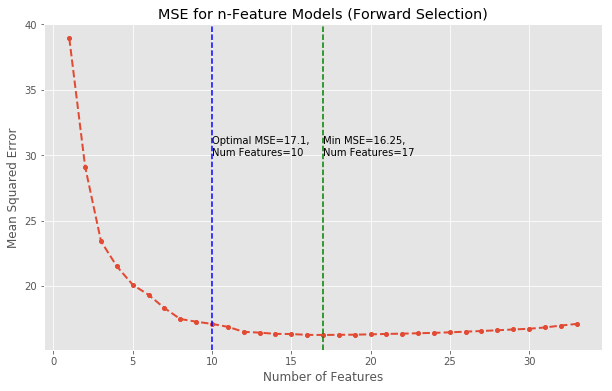

In [27]:
plt.figure(figsize=(10,6))
plt.plot([i+1 for i in range(X.shape[1])], mse_values, marker='o', linestyle='dashed', linewidth=2, markersize=4)
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error")
plt.title("MSE for n-Feature Models (Forward Selection)")
plt.axvline(x=int(min_param), color = "green", linestyle = 'dashed')
display_text = "Min MSE=" + str(round(best_params[min_param][0], 2)) + ",\nNum Features=" + str(min_param)
_ = plt.text(int(min_param), 30, display_text)

optimum_features = 10
plt.axvline(x= optimum_features, color = "blue", linestyle = 'dashed')
display_text = "Optimal MSE=" + str(round(best_params[str(optimum_features)][0], 2)) + ",\nNum Features=" + str(optimum_features)
_ = plt.text(optimum_features, 30, display_text)

In [28]:
# Store results for comparison in the end
final_mse_vals.append(round(best_params[str(optimum_features)][0],2))
models.append("Forward Selection")
num_features.append(optimum_features)

In [29]:
print("Number of features in the least MSE model:", min_param)
print("MSE Value: ", best_params[min_param][0])
print("Features in the model:\n", best_params[min_param][1])

Number of features in the least MSE model: 17
MSE Value:  16.24949366080035
Features in the model:
 ['LSTAT', 'E7', 'RM', 'PTRATIO', 'E9', 'CRIM', 'DIS', 'NOX', 'B1', 'B', 'RAD', 'E2', 'E10', 'E6', 'INDUS', 'CHAS', 'E4']


In [30]:
print("Number of features in the optimal model:", optimum_features)
print("MSE Value: ", best_params[str(optimum_features)][0])
print("Features in the model:\n", best_params[str(optimum_features)][1])

Number of features in the optimal model: 10
MSE Value:  17.097856694010638
Features in the model:
 ['LSTAT', 'E7', 'RM', 'PTRATIO', 'E9', 'CRIM', 'DIS', 'NOX', 'B1', 'B']


**Here we choose the optimal number of features to be 10, since the drop in MSE beyond that is not significant. **

### 4. Principal components ###

#### 4.1 Use raw features ####

#### 1. Consult James et al. (2015) sections 6.3 and 10.2. ####
#### 2. Perform Principal Component Analysis on all the features in your data (except the target (price) medv). ####
#### Extract all components (the number should equal to the number of features) and report: ####

In [31]:
X = boston_df[boston_df.columns.difference(['MEDV'])]
pca = PCA(random_state=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

#### (a) Variance explained by each component  ####

In [32]:
pca.explained_variance_

array([3.80442685e+07, 2.14252580e+06, 1.22469020e+05, 3.71862375e+04,
       8.39015977e+03, 3.73819303e+03, 7.38666445e+02, 3.66468182e+02,
       2.59230666e+02, 4.59907210e+01, 1.54847797e+01, 1.01457914e+01,
       3.52613815e+00, 1.56352698e+00, 1.18417724e+00, 6.14534396e-01,
       2.94788079e-01, 2.23958985e-01, 1.04696087e-01, 5.87029410e-02,
       5.45894008e-02, 4.56303652e-02, 2.94865398e-02, 2.49748520e-02,
       3.92920611e-03, 3.80132005e-03, 9.68103063e-04, 4.86509123e-04,
       2.73092187e-04, 1.28779174e-04, 1.13636989e-04, 4.28122627e-05,
       7.26168870e-06])

#### (b) Proportional variance explained by each component   ####

In [33]:
pca.explained_variance_ratio_

array([9.42622599e-01, 5.30853483e-02, 3.03441415e-03, 9.21363171e-04,
       2.07882936e-04, 9.26211850e-05, 1.83019338e-05, 9.07997984e-06,
       6.42295658e-06, 1.13951180e-06, 3.83666289e-07, 2.51382210e-07,
       8.73671027e-08, 3.87394981e-08, 2.93403521e-08, 1.52263148e-08,
       7.30396237e-09, 5.54903035e-09, 2.59405429e-09, 1.45448240e-09,
       1.35256124e-09, 1.13058327e-09, 7.30587810e-10, 6.18801750e-10,
       9.73539150e-11, 9.41852828e-11, 2.39866835e-11, 1.20542335e-11,
       6.76640339e-12, 3.19076078e-12, 2.81558297e-12, 1.06075916e-12,
       1.79922815e-13])

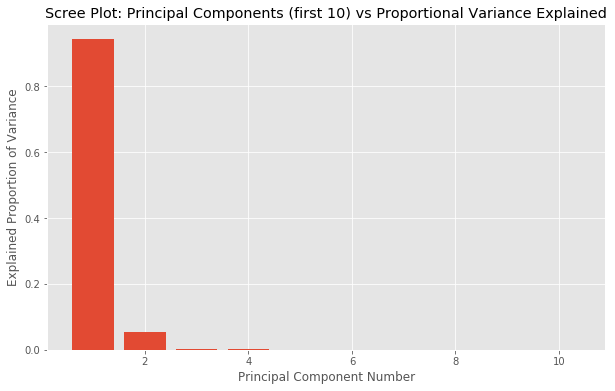

In [34]:
plt.figure(figsize=(10,6))
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Proportion of Variance")
plt.title("Scree Plot: Principal Components (first 10) vs Proportional Variance Explained")
_ = plt.bar([(i+1) for i in range(10)], pca.explained_variance_ratio_[:10])

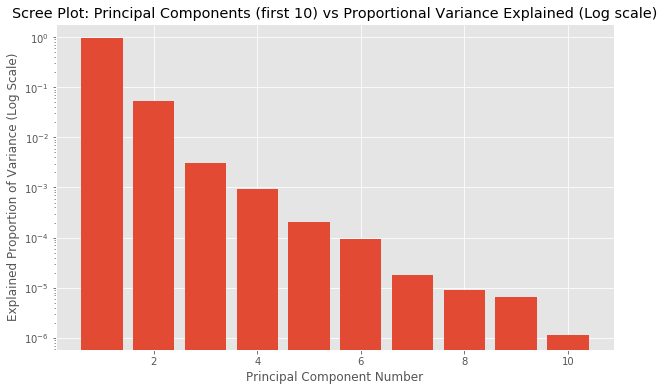

In [35]:
plt.figure(figsize=(10,6))
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Proportion of Variance (Log Scale)")
plt.title("Scree Plot: Principal Components (first 10) vs Proportional Variance Explained (Log scale)")
_ = plt.bar([(i+1) for i in range(10)], pca.explained_variance_ratio_[:10], log = True)

#### (c) Cumulative variance explained up to each component. ####

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.9426226 , 0.99570795, 0.99874236, 0.99966372, 0.99987161,
       0.99996423, 0.99998253, 0.99999161, 0.99999803, 0.99999917,
       0.99999956, 0.99999981, 0.9999999 , 0.99999993, 0.99999996,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

#### 3. Rotate data: rotate the original features according to the principal components. ####

In [37]:
X_rot = pca.fit_transform(X)

#### 4. Find the optimal model in rotated data: estimate the regression model explaining the housing value by the rotated features. Start with the first (most important) rotated feature and add rotated features to the model one-by-one. Each time cross-validate your result. ####

In [38]:
# Function to find the optimal model based on the rotated features (ordered by the proportion of variance that they explain).
def find_optimal_model(X_rot, Y, indices):
    num_iter = X_rot.shape[1]
    min_mse = 1e10  # initial, arbitrarily large value of MSE
    num_comp = 0  # to store the number of components for minimum MSE
    mse = np.empty(num_iter)  # array to store MSE values
    for i in range(num_iter):
        x = X_rot[:,:i+1]   # extract rotated features, one more than the previous iteration
        mse_current = perform_k_fold(indices, x, Y, 10)  # perform CV
        mse[i] = mse_current
        if mse_current < min_mse:
            # update the minimum MSE achieved
            min_mse = mse_current
            num_comp = i+1
    return mse, min_mse, num_comp
    

In [39]:
mse, min_mse, num_comp = find_optimal_model(X_rot, Y, indices)

In [40]:
print("Min MSE:", min_mse)
print("Min number of components:", num_comp)

Min MSE: 16.722436204817082
Min number of components: 26


#### 5. Show a plot how cross-validated MSE depends on the number of components. Which number of components will give you the  smallest MSE?####

In [41]:
# Store results for comparison in the end
optimum_features_pca = 10
final_mse_vals.append(round(mse[optimum_features_pca - 1],2))
models.append("PCA- Raw Features")
num_features.append(optimum_features_pca)

In [42]:
def plot_mse_with_pc(num_comp, mse, min_mse, optimum_features):
    plt.figure(figsize=(10,6))
    plt.plot([i+1 for i in range(X_rot.shape[1])], mse, marker='o', linestyle='dashed', linewidth=2, markersize=4)
    plt.xlabel("Number of components")
    plt.ylabel("Mean Squared Error")
    plt.title("MSE vs Number of Principal Components")
    plt.axvline(x=num_comp, color = "green", linestyle = 'dashed')
    display_text = "Min MSE=" + str(round(min_mse, 2)) + ",\nComponents=" + str(num_comp)
    _ = plt.text(num_comp, 30, display_text)
    plt.axvline(x=optimum_features, color = "blue", linestyle = 'dashed')
    display_text = "Optimal MSE=" + str(round(mse[optimum_features - 1], 2)) + ",\nComponents=" + str(optimum_features)
    _ = plt.text(optimum_features, 30, display_text)

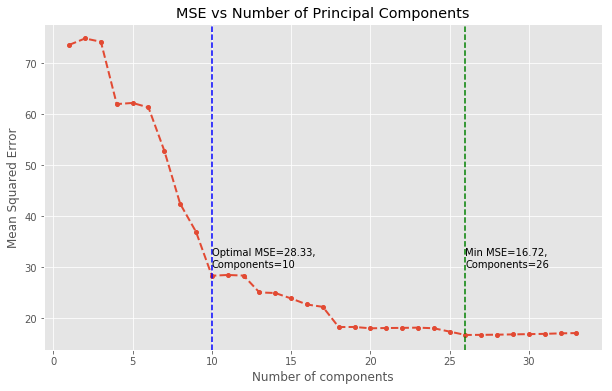

In [43]:
plot_mse_with_pc(num_comp, mse, min_mse, optimum_features_pca)

In [44]:
print("Optimal MSE:", mse[9])
print("Optimal number of components:", optimum_features_pca)

Optimal MSE: 28.33335017234894
Optimal number of components: 10


**Here again, we choose the optimal number of transformed features to be 10, where the steepest drop in MSE ends. We avoid going for the lowest MSE value since that would mean compromising on compactness of the model quite a bit.**

#### 4.2 PCA on normalized data ####

In [45]:
# Function to normalize a given vector of values
def normalize_feature(x):
    return (x - np.mean(x))/np.std(x)

In [46]:
# Function to normalize the entire feature set
def normalize_data_set(X):
    for i in range(X.shape[1]):
        X[:,i] = normalize_feature(X[:,i])  # update each feature
    return X

In [47]:
Xn = normalize_data_set(boston_df[boston_df.columns.difference(['MEDV'])].as_matrix())

#### 1. Perform Principal Component Analysis on the normalized features. ####

In [48]:
pca_n = PCA()
pca_n.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### a) Variance explained by each component ####

In [49]:
pca_n.explained_variance_

array([1.07163507e+01, 5.14878549e+00, 2.37191766e+00, 2.26810196e+00,
       2.04482754e+00, 1.71177048e+00, 1.27683221e+00, 1.07336004e+00,
       9.94954490e-01, 9.25556843e-01, 7.77768570e-01, 6.47534905e-01,
       5.10340249e-01, 4.69664493e-01, 3.64239059e-01, 3.33393030e-01,
       3.20151212e-01, 2.06802610e-01, 1.81598126e-01, 1.62454051e-01,
       1.24398301e-01, 1.07861798e-01, 1.01013295e-01, 8.70203041e-02,
       6.89987935e-02, 3.41289318e-02, 1.68803068e-02, 5.84268393e-03,
       5.47199151e-03, 3.44999126e-03, 2.06214749e-03, 1.69022584e-03,
       1.24001508e-04])

#### (b) Proportional variance explained by each component ####

In [50]:
pca_n.explained_variance_ratio_

array([3.24096127e-01, 1.55715455e-01, 7.17342448e-02, 6.85945317e-02,
       6.18420116e-02, 5.17693191e-02, 3.86154190e-02, 3.24617812e-02,
       3.00905508e-02, 2.79917479e-02, 2.35221660e-02, 1.95834907e-02,
       1.54342931e-02, 1.42041304e-02, 1.10157339e-02, 1.00828531e-02,
       9.68237884e-03, 6.25436089e-03, 5.49209808e-03, 4.91312108e-03,
       3.76219559e-03, 3.26207977e-03, 3.05495951e-03, 2.63176749e-03,
       2.08674037e-03, 1.03216616e-03, 5.10513531e-04, 1.76701125e-04,
       1.65490221e-04, 1.04338579e-04, 6.23658213e-05, 5.11177417e-05,
       3.75019532e-06])

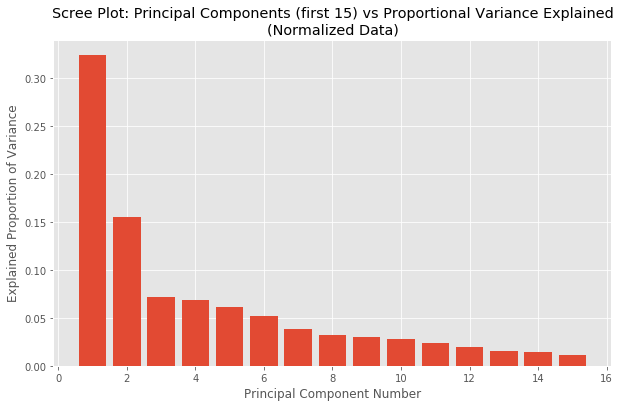

In [51]:
plt.figure(figsize=(10,6))
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Proportion of Variance")
plt.title("Scree Plot: Principal Components (first 15) vs Proportional Variance Explained\n(Normalized Data)")
_ = plt.bar([(i+1) for i in range(15)], pca_n.explained_variance_ratio_[:15])

#### (c) Cumulative variance explained up to each component. ####

In [52]:
pca_n.explained_variance_ratio_.cumsum()

array([0.32409613, 0.47981158, 0.55154583, 0.62014036, 0.68198237,
       0.73375169, 0.77236711, 0.80482889, 0.83491944, 0.86291119,
       0.88643335, 0.90601684, 0.92145114, 0.93565527, 0.946671  ,
       0.95675385, 0.96643623, 0.97269059, 0.97818269, 0.98309581,
       0.98685801, 0.99012009, 0.99317505, 0.99580682, 0.99789356,
       0.99892572, 0.99943624, 0.99961294, 0.99977843, 0.99988277,
       0.99994513, 0.99999625, 1.        ])

#### 2. Rotate data: rotate the original features according to the principal components ####

In [53]:
Xn_rot = pca_n.fit_transform(Xn)

#### 3. Find the optimal model ####

In [54]:
mse, min_mse, num_comp = find_optimal_model(Xn_rot, Y, indices)

In [55]:
print("Minimum MSE:", mse[32])
print("Number of features for min MSE:", num_comp)

Minimum MSE: 17.093934279414352
Number of features for min MSE: 33


In [56]:
# Store results for comparison in the end
optimum_features_pca_norm = 6
final_mse_vals.append(round(mse[optimum_features_pca_norm - 1],2))
models.append("PCA- Normalized Features")
num_features.append(optimum_features_pca_norm)

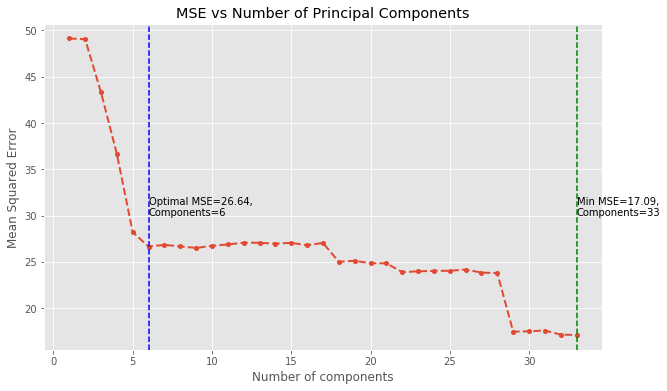

In [57]:
plot_mse_with_pc(num_comp, mse, min_mse, optimum_features_pca_norm)

In [58]:
print("Optimal MSE:", mse[optimum_features_pca_norm - 1])
print("Number of features for optimal MSE:", optimum_features_pca_norm)

Optimal MSE: 26.644798649160048
Number of features for optimal MSE: 6


**We choose the optimal number of transformed features to be 6, where the steepest drop in the MSE curve ends, similar to the raw features case, so as to obtain a compact model.**

#### 4.3 What's the best solution? ####
#### Compare all your results: full model, forward selection, PCA on raw data, and PCA on normalized data. Which one is most precise? Which one is most compact? Which one is the easiest to do? Which one is the most straightforward to interpret? ####

In [59]:
comparison_df = pd.DataFrame({'Model': models, 'Number of Features': num_features, 'Optimal MSE': final_mse_vals},
                            columns=['Model', 'Number of Features', 'Optimal MSE'])
comparison_df = comparison_df.set_index('Model')
comparison_df

,Number of Features,Optimal MSE
Model,,
Full Model,33,17.09
Forward Selection,10,17.10
PCA- Raw Features,10,28.33
PCA- Normalized Features,6,26.64


* We see above that in terms of precision, the model based on Forward Selection is the best, with the lowest mean quadratic loss using 10 features (the full model has a similar MSE, but uses a lot more features).
* The most compact model is based on PCA with Normalized Features. It gives an acceptable level of mean quadratic loss with just 6 features.
* The Full Model was the easiest to do, since the other models involved figuring out an optimal set of features and therefore required more analysis and computations.
* The Forward Selection model was the most straightforward to interpret, since it resulted in a small number of important features for predicting median house value,  disregarding the bogus features introduced. The PCA models also did something similar, however, these mapped the features into principal components, whose interpretability in terms of the original features is difficult.